# Import libraries


In [1]:
!pip install scikit-learn-extra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import os
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.0 MB/s eta 0:00:00


# Load the dataset


In [3]:
data = pd.read_csv('CC GENERAL.csv', sep=',')

# Exploratory Data Analysis


In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
len(data.columns)

18

In [6]:
data.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
len(data)

8950

In [9]:
data['MINIMUM_PAYMENTS'].value_counts()

,count
MINIMUM_PAYMENTS,
299.351881,2
342.286490,1
184.464721,1
276.486072,1
309.140865,1
...,...
181.773223,1
711.894455,1
256.522546,1


**VALORES FALTANTES** :

*   MINIMUM_PAYMENTS
*   CREDIT_LIMIT



Primero trataremos de encontrar la razón de los valores faltantes para los pagos mínimos

In [10]:
# Filtrar los datos para obtener los clientes con valores nulos en 'MINIMUM_PAYMENTS'
null_min_payments = data[data['MINIMUM_PAYMENTS'].isnull()]

# Mostrar los pagos ('PAYMENTS') de estos clientes
print(null_min_payments['PAYMENTS'])

3         0.000000
45        0.000000
47        0.000000
54      417.016763
55        0.000000
           ...    
8919      0.000000
8929      0.000000
8935      0.000000
8944      0.000000
8946    275.861322
Name: PAYMENTS, Length: 313, dtype: float64


In [11]:
# Clientes con pagos iguales a 0
zero_payments = null_min_payments[null_min_payments['PAYMENTS'] == 0]

# Clientes con pagos mayores que 0
non_zero_payments = null_min_payments[null_min_payments['PAYMENTS'] > 0]

In [12]:
print(f'Clientes con pagos iguales a 0: {len(zero_payments)}')
print(f'Clientes con pagos mayores que 0: {len(non_zero_payments)}')

Clientes con pagos iguales a 0: 240
Clientes con pagos mayores que 0: 73


Reemplazo con 0 los minimos pagos donde los valores de Payment sean iguales a 0

In [13]:
#Reemplaza NaN en 'MINIMUM_PAYMENTS' con 0 solo si 'PAYMENTS' es 0
data.loc[(data['MINIMUM_PAYMENTS'].isnull()) & (data['PAYMENTS'] == 0), 'MINIMUM_PAYMENTS'] = 0

In [14]:
data['MINIMUM_PAYMENTS'].isnull().sum()

73

In [15]:
(73 / 8949) * 100

0.8157336015197229

Como es un porcentaje muy bajo para todo el data set se procede a borrar esa información

In [16]:
data_sin_nulos= data.dropna(subset=['MINIMUM_PAYMENTS'])

verificamos que no esten

In [17]:
data_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8877 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8877 non-null   object 
 1   BALANCE                           8877 non-null   float64
 2   BALANCE_FREQUENCY                 8877 non-null   float64
 3   PURCHASES                         8877 non-null   float64
 4   ONEOFF_PURCHASES                  8877 non-null   float64
 5   INSTALLMENTS_PURCHASES            8877 non-null   float64
 6   CASH_ADVANCE                      8877 non-null   float64
 7   PURCHASES_FREQUENCY               8877 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8877 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8877 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8877 non-null   float64
 11  CASH_ADVANCE_TRX                  8877 non-null   int64  
 12  PURCHASES_T

Ahora continuaremos con credit limit donde filtraremos el unico valor faltante de esta variable para entender su comportamiento

In [18]:
# Filtrar los datos para obtener los clientes con valores nulos en 'CREDIT_LIMIT'
null_credit_limit = data[data['CREDIT_LIMIT'].isnull()]

In [19]:
null_credit_limit

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


Se evidencia que es una tarjeta relativamente nueva ya que solo tiene 6 meses así que como es 1 solo valor faltante se procede a borrar al cliente para el estudio respectivo.

In [20]:
datafinal1= data_sin_nulos.dropna(subset=['CREDIT_LIMIT'])

In [21]:
datafinal1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8876 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8876 non-null   object 
 1   BALANCE                           8876 non-null   float64
 2   BALANCE_FREQUENCY                 8876 non-null   float64
 3   PURCHASES                         8876 non-null   float64
 4   ONEOFF_PURCHASES                  8876 non-null   float64
 5   INSTALLMENTS_PURCHASES            8876 non-null   float64
 6   CASH_ADVANCE                      8876 non-null   float64
 7   PURCHASES_FREQUENCY               8876 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8876 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8876 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8876 non-null   float64
 11  CASH_ADVANCE_TRX                  8876 non-null   int64  
 12  PURCHASES_T

**Datos duplicados**

In [22]:
# Cuenta las filas duplicadas en todo el DataFrame
num_duplicados_total = data.duplicated().sum()

# Muestra el número total de filas duplicadas
print(f"Número total de filas duplicadas: {num_duplicados_total}")

Número total de filas duplicadas: 0


No hay filas valores duplicados

# Exploratory Data Analysis

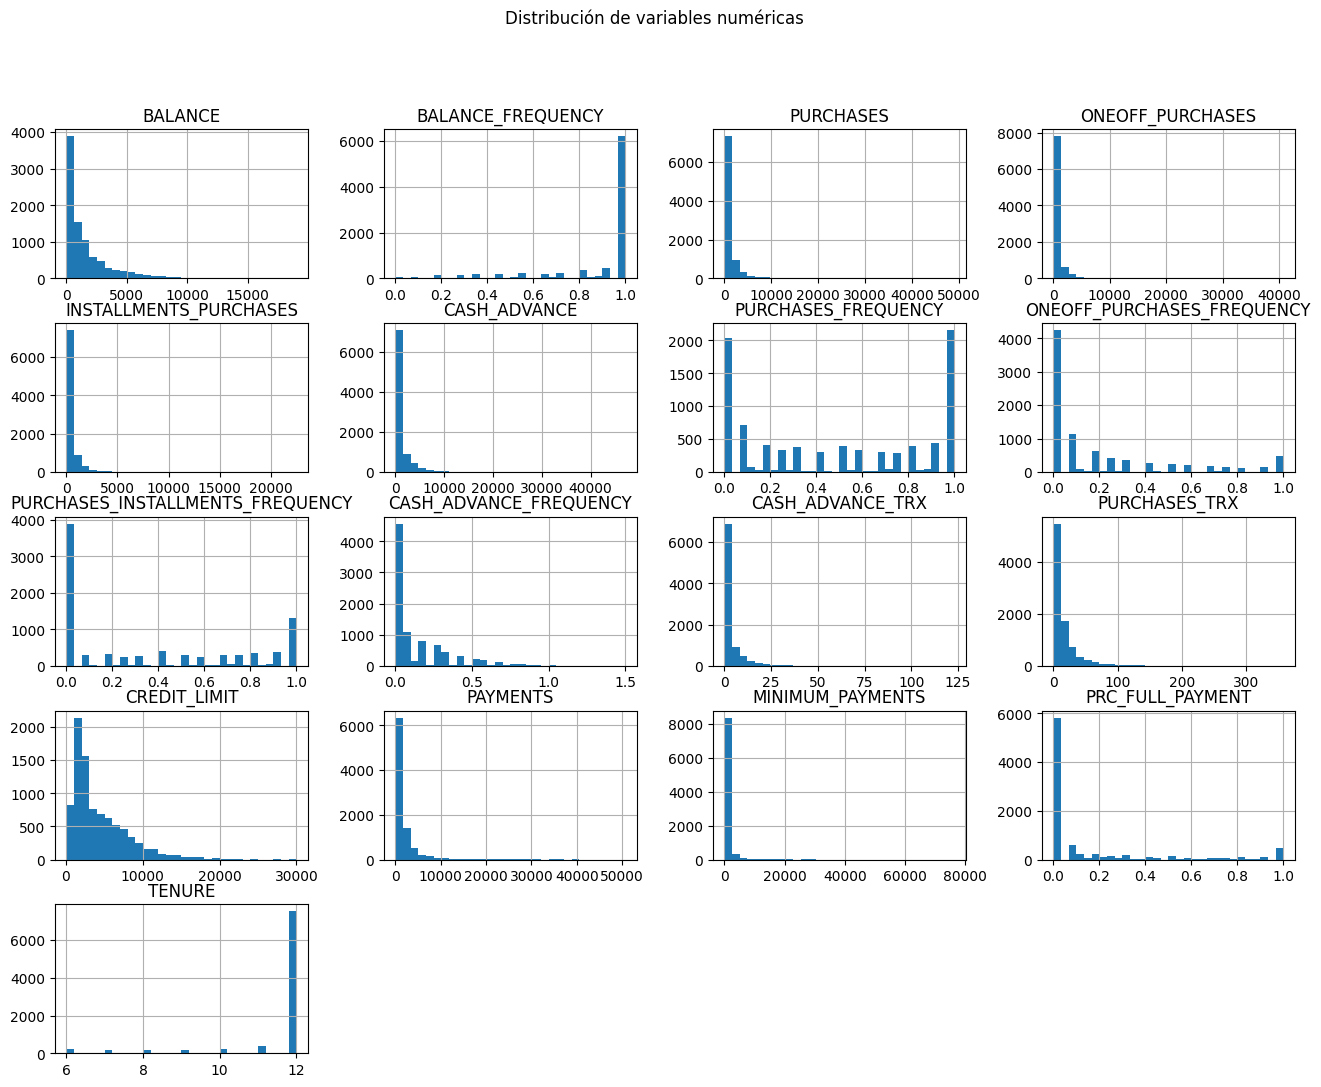

In [23]:
datafinal1.hist(figsize=(16,12), bins=30)
plt.suptitle("Distribución de variables numéricas")
plt.show()

In [24]:
datafinal1.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

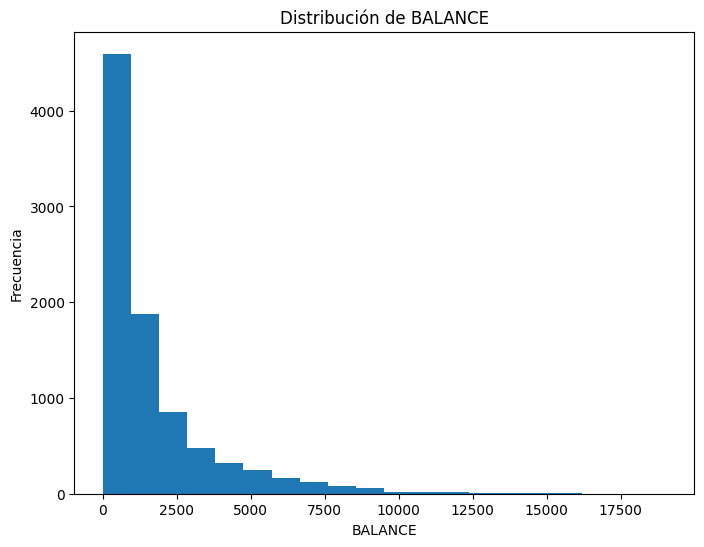

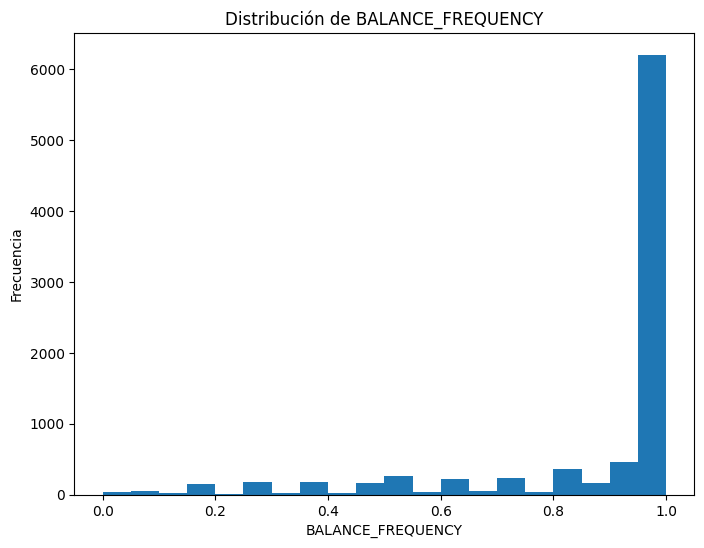

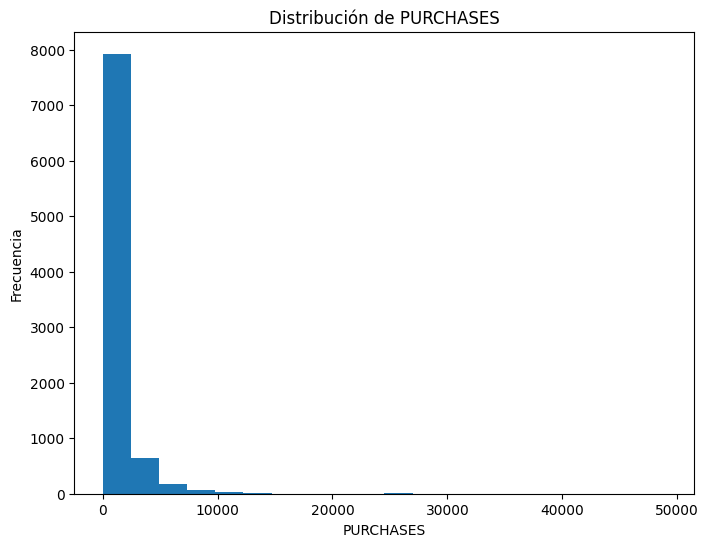

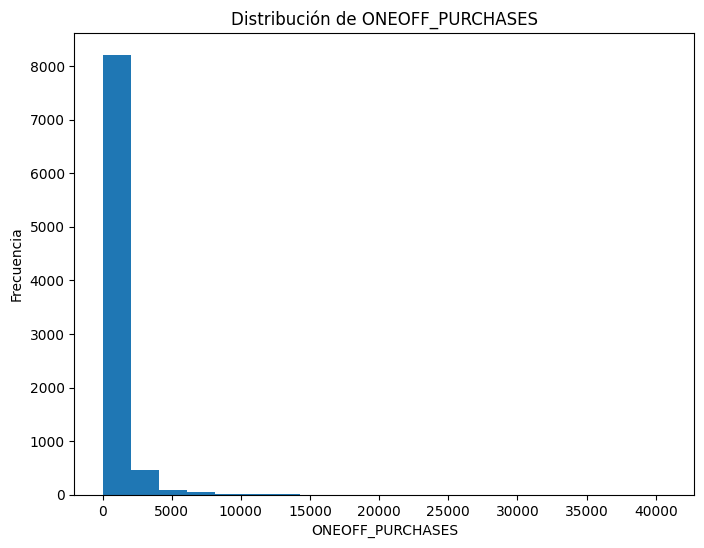

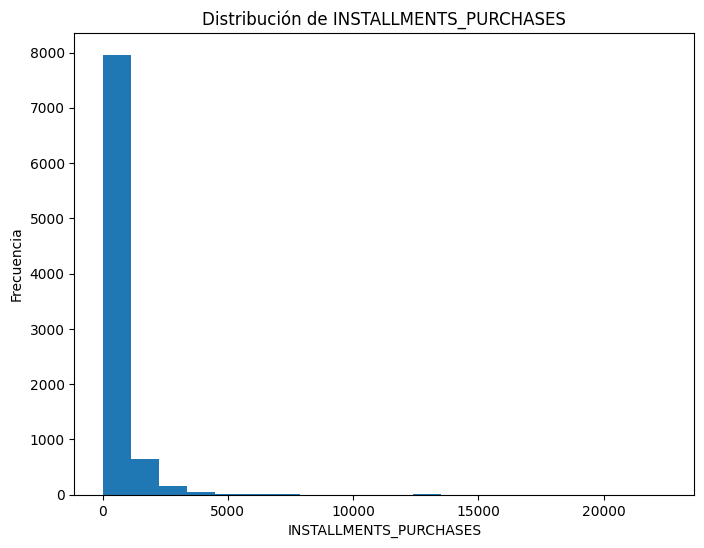

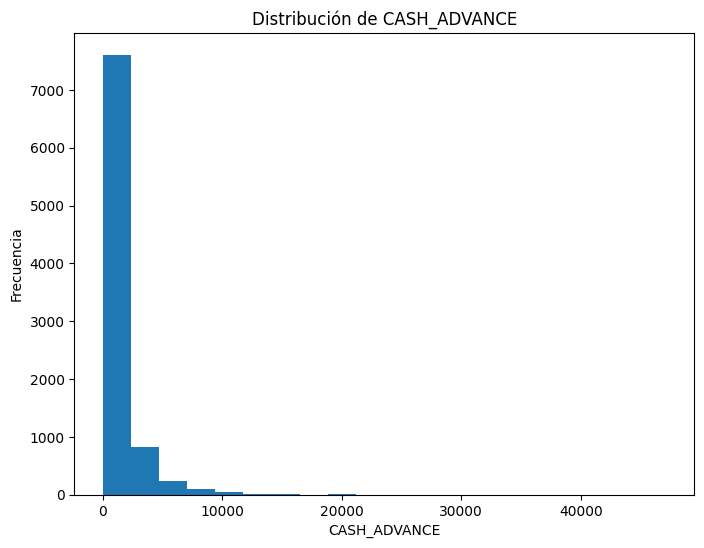

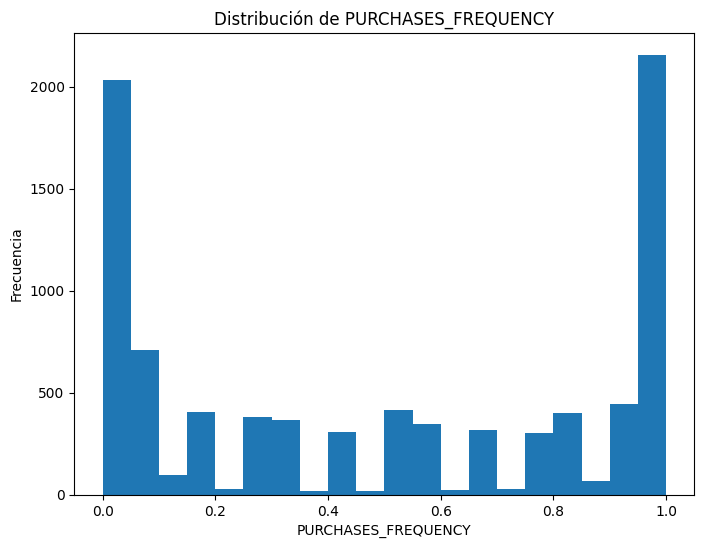

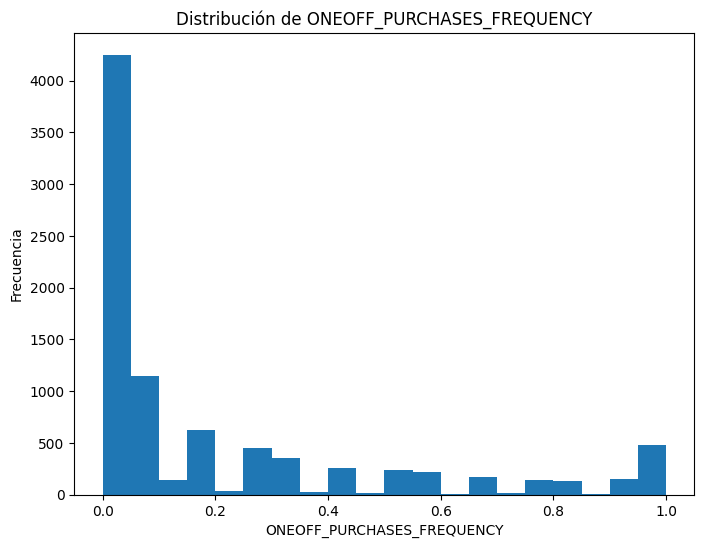

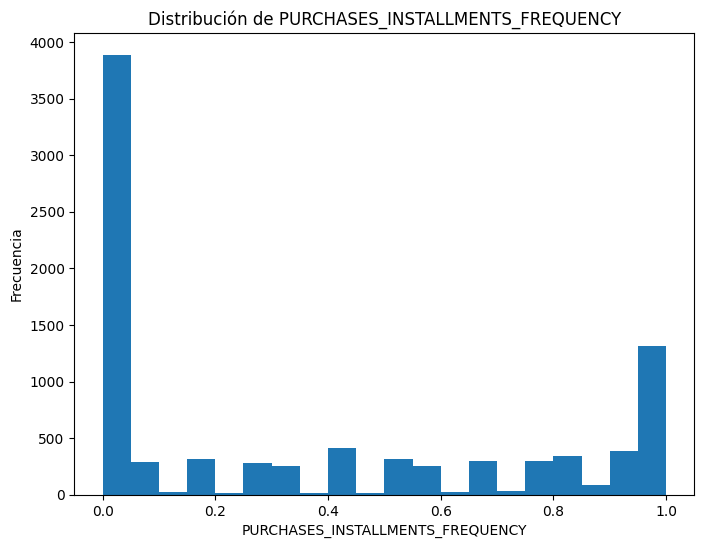

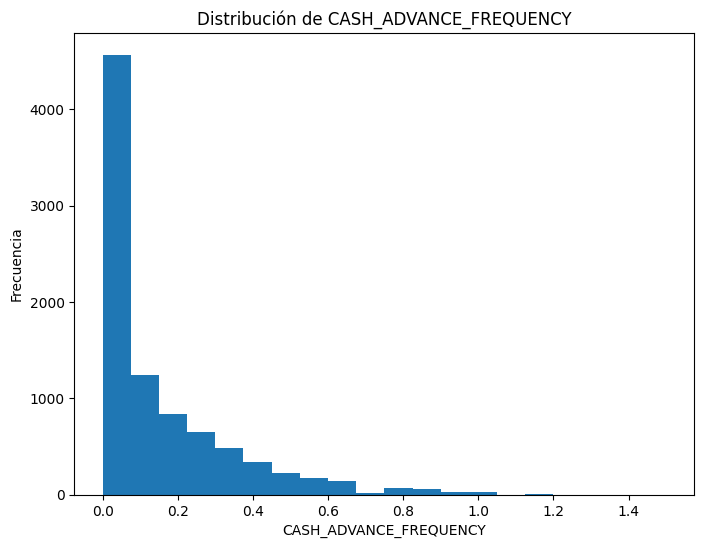

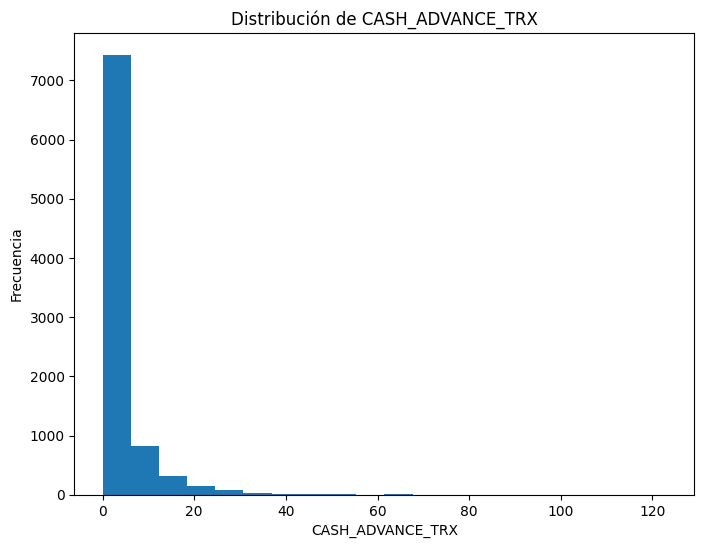

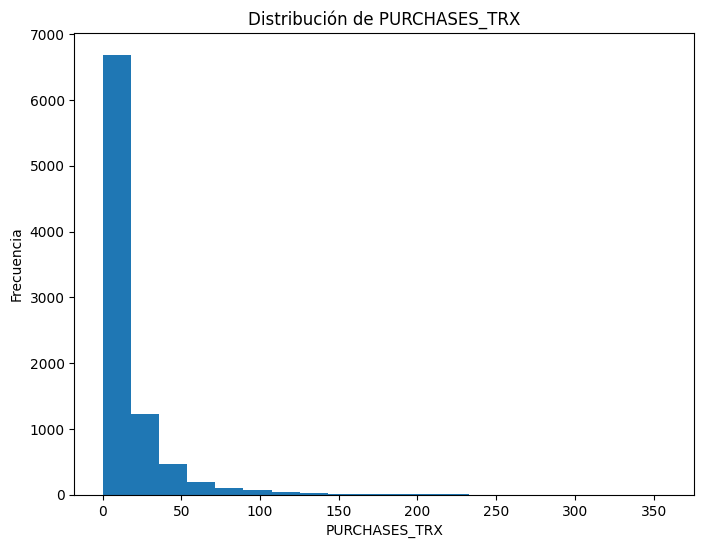

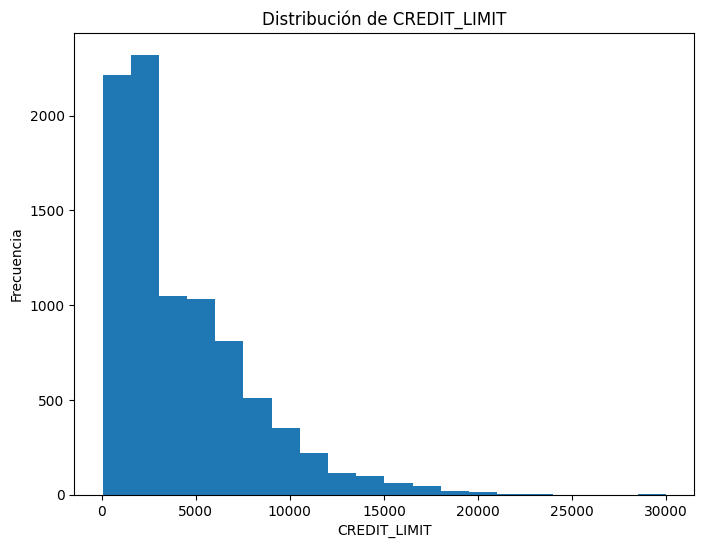

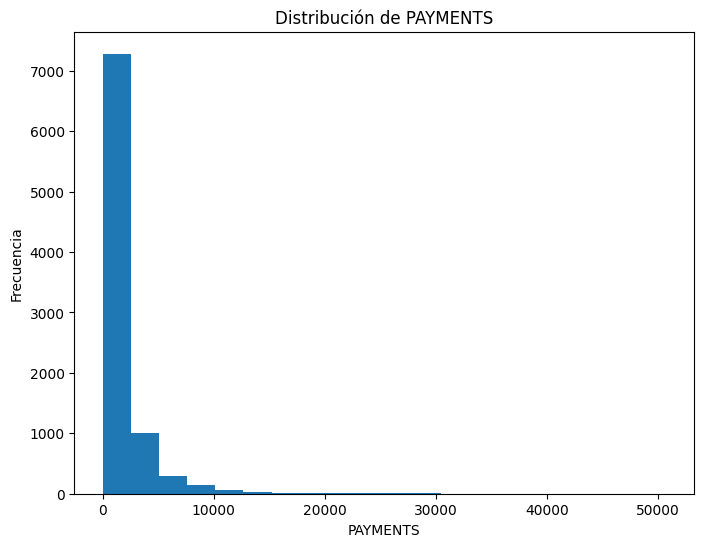

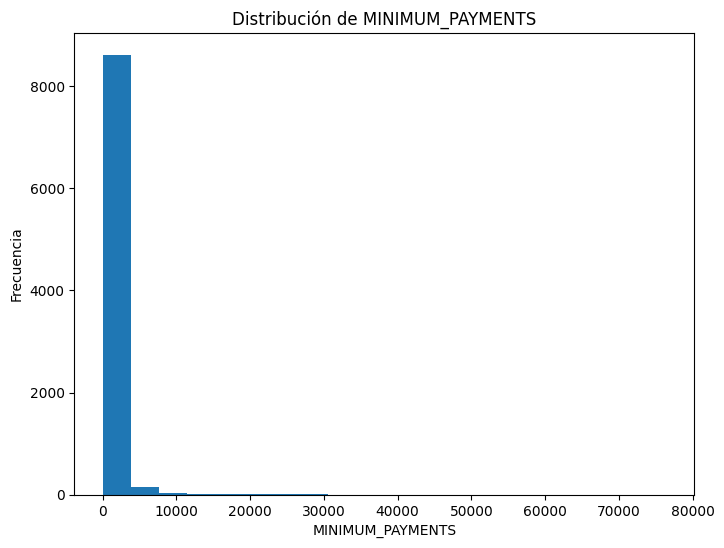

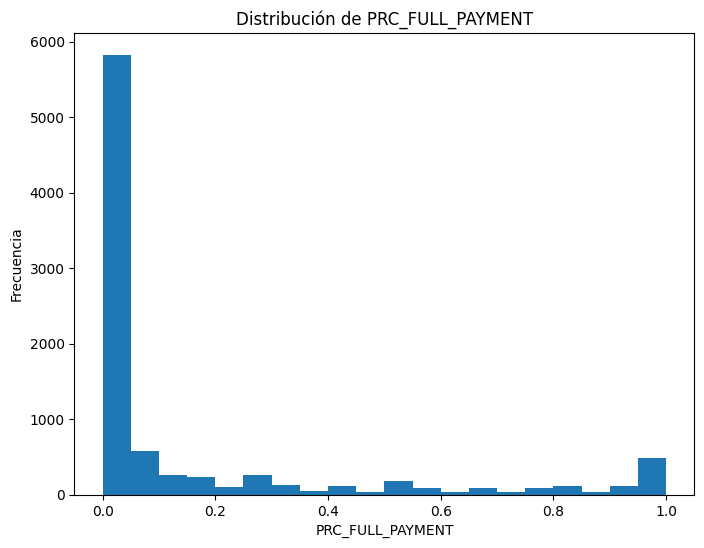

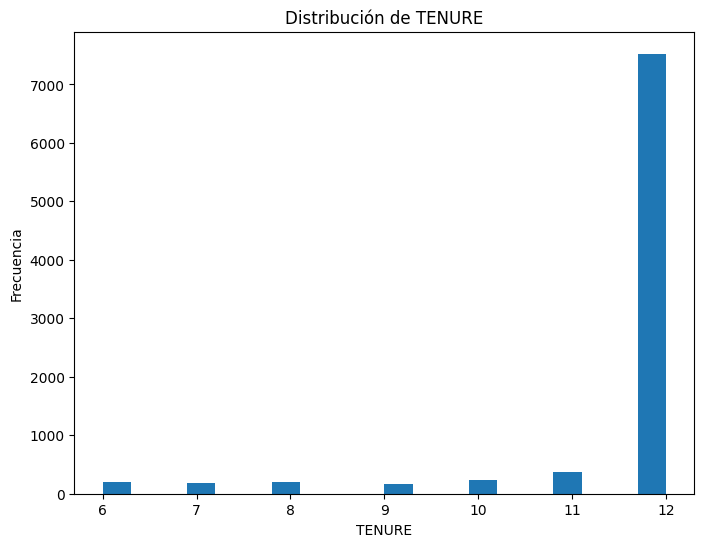

In [25]:
import matplotlib.pyplot as plt

# Lista de variables numéricas que quieres visualizar
numerical_vars = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Crear un histograma para cada variable
for var in numerical_vars:
    plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
    plt.hist(datafinal1[var], bins=20)  # Ajustar el número de bins si es necesario
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

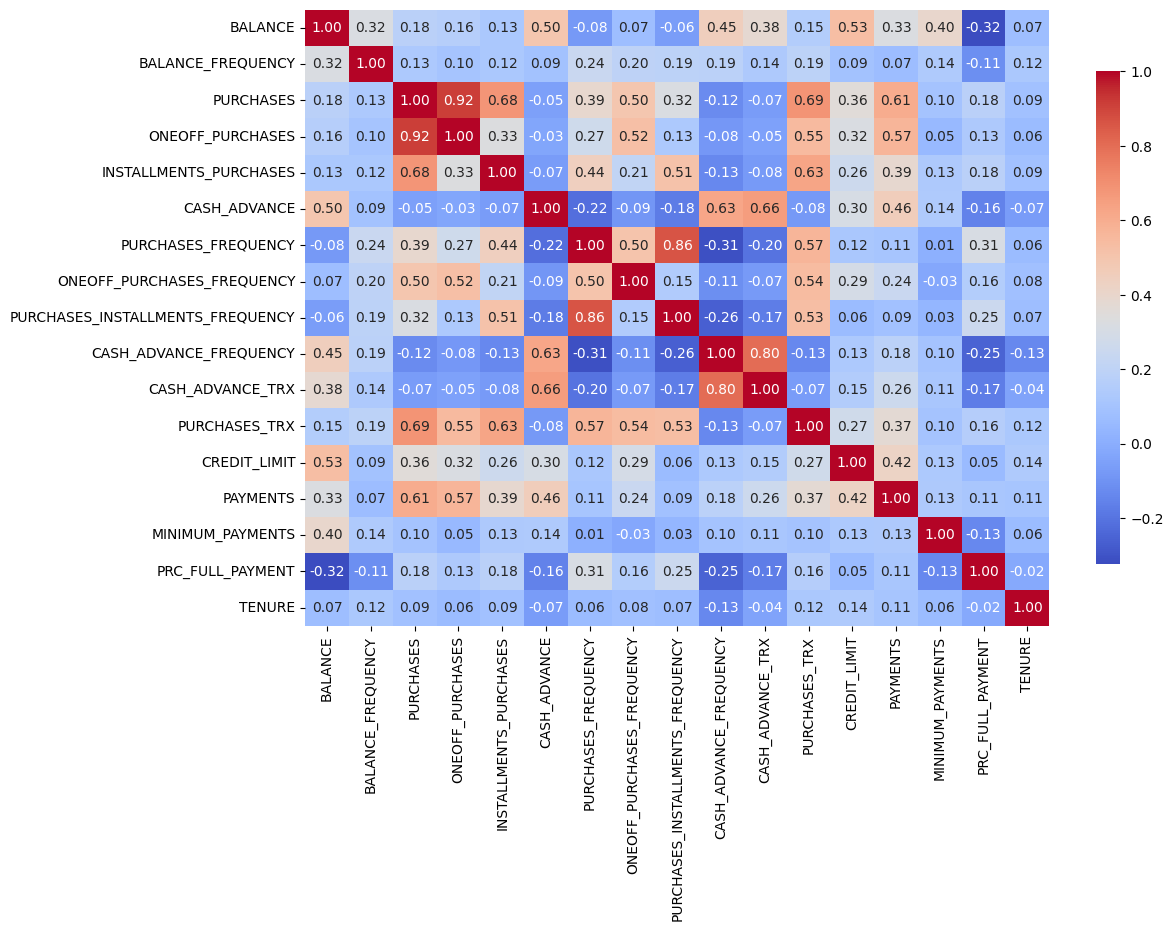

In [26]:
# Ajustar el tamaño de la figura para que sea más grande
plt.figure(figsize=(12, 8))

# Crear el heatmap con ajustes en el tamaño de la fuente y formato de anotaciones
sns.heatmap(datafinal1.corr(numeric_only=True), annot=True, fmt='.2f',
            cmap='coolwarm', annot_kws={"size": 10}, cbar_kws={'shrink': 0.8})

# Mostrar el heatmap
plt.show()

# Data Processing


## Data Cleaning


## Feature Engineering
Cree al menos 2 variables nuevas


Ratio de Utilización del Crédito
*   Indica qué tan cerca está un cliente de su límite de crédito
*   Es un indicador clave que ayuda a entender el nivel de dependencia que tiene un cliente de su crédito disponible. Un ratio alto puede ser un signo de riesgo financiero, mientras que un ratio bajo puede indicar un uso responsable del crédito.


In [27]:
datafinal1['CREDIT_UTILIZATION_RATIO'] = datafinal1['BALANCE'] / datafinal1['CREDIT_LIMIT']

<ipython-input-27-c7fd64fccdca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafinal1['CREDIT_UTILIZATION_RATIO'] = datafinal1['BALANCE'] / datafinal1['CREDIT_LIMIT']


2. Promedio de Pagos Mensuales

*   Es una medida que indica cuánto paga un cliente en promedio cada mes hacia su saldo de tarjeta de crédito.
*   Este valor puede ser útil para evaluar la regularidad de los pagos de un cliente y su capacidad para cumplir con sus obligaciones financieras.



In [28]:
datafinal1['AVERAGE_PAYMENT']= datafinal1['PAYMENTS'] / datafinal1['TENURE']

<ipython-input-28-62c0d6bd8b08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafinal1['AVERAGE_PAYMENT']= datafinal1['PAYMENTS'] / datafinal1['TENURE']


## Encoding


In [29]:
datafinal1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8876 entries, 0 to 8949
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8876 non-null   object 
 1   BALANCE                           8876 non-null   float64
 2   BALANCE_FREQUENCY                 8876 non-null   float64
 3   PURCHASES                         8876 non-null   float64
 4   ONEOFF_PURCHASES                  8876 non-null   float64
 5   INSTALLMENTS_PURCHASES            8876 non-null   float64
 6   CASH_ADVANCE                      8876 non-null   float64
 7   PURCHASES_FREQUENCY               8876 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8876 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8876 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8876 non-null   float64
 11  CASH_ADVANCE_TRX                  8876 non-null   int64  
 12  PURCHASES_T

No se realiza el encoding puesto que todas las variables estan en su forma numerica a excepción de CUST ID que sera excluida porque no es pertinente para el estudio

## StandardScaler


In [30]:
datafinal1

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_UTILIZATION_RATIO,AVERAGE_PAYMENT
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0.040901,16.816840
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.457495,341.919383
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.332687,51.838895
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,0.222223,0.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0.681429,56.527897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,0.000000,0.000000,6,0.048393,0.000000
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0.028494,54.265744
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0.023399,13.545129
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0.026915,8.758327


In [31]:
# Eliminar la columna de ID si no es necesaria
df_clean = datafinal1.drop('CUST_ID', axis=1)

In [32]:
# Detectar valores atípicos usando el IQR (Interquartile Range)
Q1 = df_clean.quantile(0.25)
Q3 = df_clean.quantile(0.75)
IQR = Q3 - Q1

# Identificar filas que tienen valores atípicos
outliers = df_clean[((df_clean < (Q1 - 1.5 * IQR)) | (df_clean > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Número de valores atípicos: {len(outliers)}")


Número de valores atípicos: 5960


In [33]:
# StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
df_scaled = scaler.fit_transform(df_clean)

# Convertir a DataFrame para mantener las etiquetas de las columnas
df_scaled = pd.DataFrame(df_scaled, columns=df_clean.columns)

# Visualizar los primeros datos escalados
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_UTILIZATION_RATIO,AVERAGE_PAYMENT
0,-0.736905,-0.287766,-0.426040,-0.357926,-0.349910,-0.468992,-0.806206,-0.681576,-0.705852,-0.678664,-0.478306,-0.512413,-0.961640,-0.531938,-0.299201,-0.528346,0.359995,-0.901199,-0.536613
1,0.779306,0.113037,-0.470533,-0.357926,-0.455019,2.593303,-1.221417,-0.681576,-0.915619,0.567547,0.105923,-0.592596,0.684124,0.820499,0.098709,0.229157,0.359995,0.167785,0.781337
2,0.440093,0.513839,-0.109937,0.106237,-0.455019,-0.468992,1.269844,2.662996,-0.915619,-0.678664,-0.478306,-0.111498,0.821271,-0.386245,-0.091135,-0.528346,0.359995,-0.152475,-0.394635
3,0.042775,-1.089371,0.228579,0.541981,-0.455019,-0.371182,-1.013812,-0.402863,-0.915619,-0.263262,-0.332249,-0.552505,0.821271,-0.601897,-0.358710,-0.528346,0.359995,-0.435925,-0.604787
4,-0.364364,0.513839,-0.463071,-0.348321,-0.455019,-0.468992,-1.013812,-0.402863,-0.915619,-0.678664,-0.478306,-0.552505,-0.906781,-0.366739,-0.254292,-0.528346,0.359995,0.742399,-0.375626


In [34]:
df_scaled.isnull().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


## # Train model/Tune hyperparameters

Explique el criterio utilizado

In [35]:
# Método del Codo
sse = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

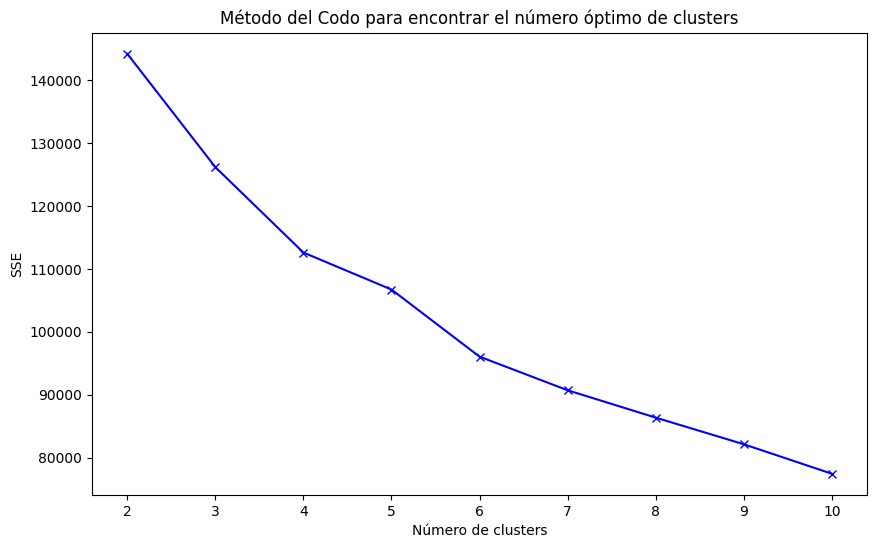

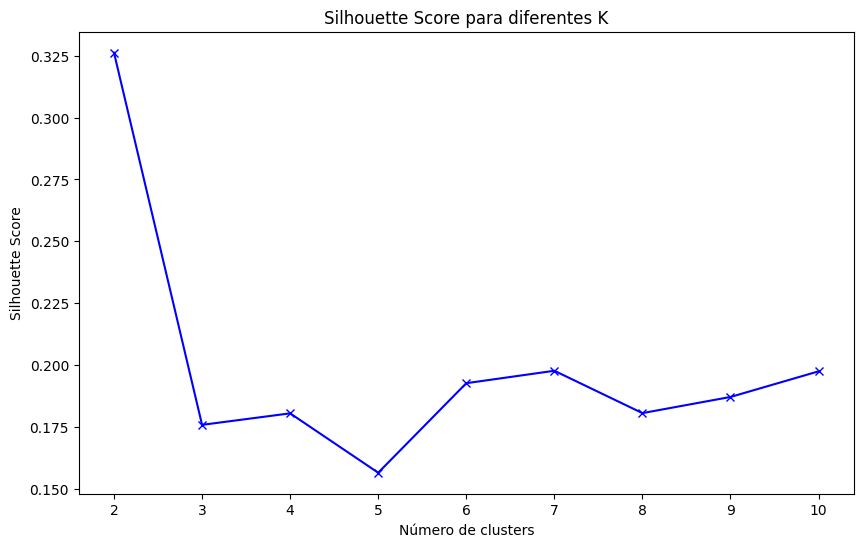

In [36]:
# Gráfico del método del Codo
plt.figure(figsize=(10, 6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.show()

# Gráfico del Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes K')
plt.show()

Utilizamos el **algoritmo K-Means** para agrupar un conjunto de datos en \(k\) clústeres, asignando cada observación al grupo más cercano según las características similares. Este método es popular por su simplicidad y eficiencia al segmentar datos en grupos balanceados, donde cada clúster tiene un centroide que representa el promedio de sus puntos.

Usamos el **Método del Codo** para determinar el número óptimo de clústeres al observar el punto donde añadir más clústeres no mejora significativamente la inercia. Además, la **Puntuación Silhouette** nos ayuda a evaluar la calidad de la separación entre los clústeres, asegurando que los grupos estén bien definidos y diferenciados.

In [37]:
# Definir el número óptimo de clústeres (según el análisis anterior)
optimal_k = 6

# Aplicar K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Aplicar K-Medoids
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)
kmedoids_labels = kmedoids.fit_predict(df_scaled)

# Evaluar ambos modelos con la puntuación Silhouette
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
kmedoids_silhouette = silhouette_score(df_scaled, kmedoids_labels)

# Obtener la inercia (SSE) para K-Means
kmeans_inertia = kmeans.inertia_

# Para K-Medoids, calcular la suma de distancias a los medoides
kmedoids_inertia = kmedoids.inertia_

# Mostrar los resultados
print(f"K-Means - Silhouette Score: {kmeans_silhouette}")
print(f"K-Means - Inercia (SSE): {kmeans_inertia}")
print(f"K-Medoids - Silhouette Score: {kmedoids_silhouette}")
print(f"K-Medoids - Inercia (Suma de distancias): {kmedoids_inertia}")


K-Means - Silhouette Score: 0.192654992431163
K-Means - Inercia (SSE): 96050.39374275885
K-Medoids - Silhouette Score: 0.05901601849188666
K-Medoids - Inercia (Suma de distancias): 25798.78792631033


In [38]:
# Ejemplo DBSCAN

param_grid = {
    'eps': [0.1, 0.2, 0.3, 0.5, 0.7,0.10],  # Distancia de radio
    'min_samples': [3, 5, 10,15]  # Número mínimo de puntos para formar un cluster
}

# Variable para almacenar los mejores resultados
best_score = -1
best_params = {}

# Búsqueda manual (Grid Search)
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        # Definir el modelo con los parámetros actuales
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # Ajustar el modelo
        labels = dbscan.fit_predict(df_scaled)

        # Verificar que haya clusters generados, ya que DBSCAN puede generar ruido (label -1)
        if len(set(labels)) > 1:  # Necesitamos al menos 2 clusters para calcular el Silhouette Score
            # Evaluar el modelo con Silhouette Score
            score = silhouette_score(df_scaled, labels)

            # Guardar si es el mejor score
            if score > best_score:
                best_score = score
                best_params = {
                    'eps': eps,
                    'min_samples': min_samples
                }

# Imprimir los mejores parámetros y el mejor score
print(f"Mejores Parámetros: {best_params}")
print(f"Mejor Silhouette Score: {best_score:.4f}")


Mejores Parámetros: {'eps': 0.7, 'min_samples': 15}
Mejor Silhouette Score: -0.1630


#ROBUSTSCALER
Elegí RobustScaler porque mis datos contienen una cantidad significativa de outliers, y este escalador es ideal para manejar ese tipo de situaciones. A diferencia de otros métodos de escalado que se ven afectados por valores extremos, RobustScaler utiliza la mediana y los cuartiles en lugar de la media y los valores mínimos y máximos, lo que lo hace menos sensible a los outliers. Esto garantiza que el escalado de las características no esté distorsionado por valores atípicos, permitiendo que los algoritmos de clustering puedan identificar patrones reales en los datos sin que las distancias sean afectadas de manera desproporcionada por esos valores extremos.

In [39]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled1 = scaler.fit_transform(df_clean)
df_scaled1 = pd.DataFrame(df_scaled1, columns=df_clean.columns)


In [40]:
# Método del Codo
sse = []
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled1)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled1, kmeans.labels_))

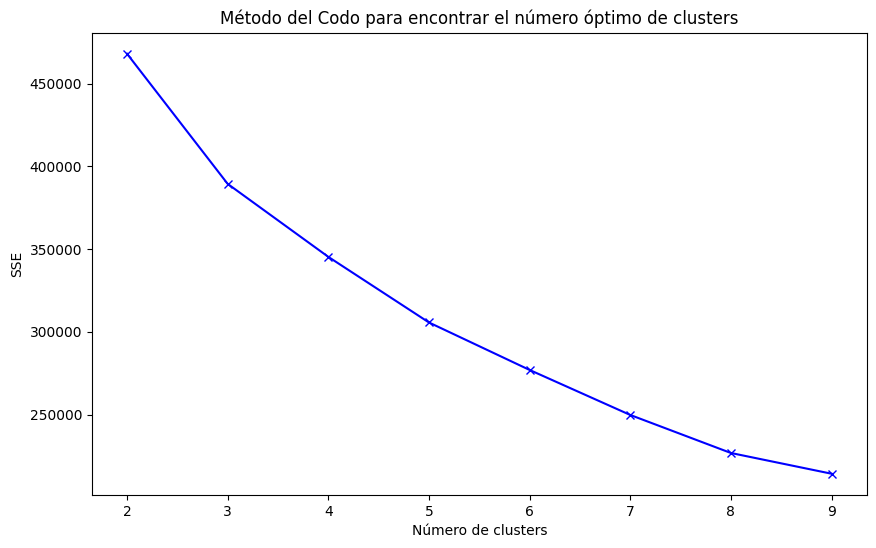

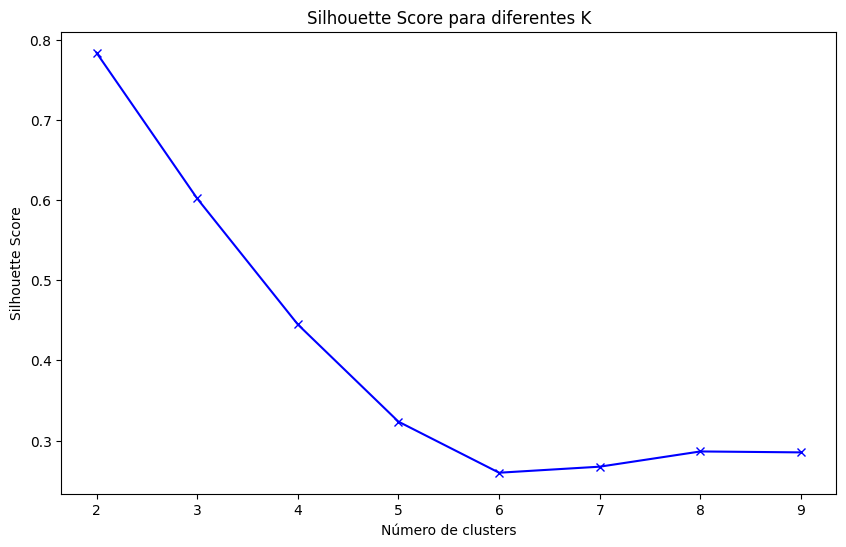

In [41]:
# Gráfico del método del Codo
plt.figure(figsize=(10, 6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.show()

# Gráfico del Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes K')
plt.show()

In [42]:
# Definir el número óptimo de clústeres (según el análisis anterior)
optimal_k =4

# Aplicar K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled1)

# Aplicar K-Medoids
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)
kmedoids_labels = kmedoids.fit_predict(df_scaled1)

# Evaluar ambos modelos con la puntuación Silhouette
kmeans_silhouette = silhouette_score(df_scaled1, kmeans_labels)
kmedoids_silhouette = silhouette_score(df_scaled1, kmedoids_labels)

# Obtener la inercia (SSE) para K-Means
kmeans_inertia = kmeans.inertia_

# Para K-Medoids, calcular la suma de distancias a los medoides
kmedoids_inertia = kmedoids.inertia_

# Mostrar los resultados
print(f"K-Means - Silhouette Score: {kmeans_silhouette}")
print(f"K-Means - Inercia (SSE): {kmeans_inertia}")
print(f"K-Medoids - Silhouette Score: {kmedoids_silhouette}")
print(f"K-Medoids - Inercia (Suma de distancias): {kmedoids_inertia}")


K-Means - Silhouette Score: 0.4447550993999195
K-Means - Inercia (SSE): 345281.8396375651
K-Medoids - Silhouette Score: 0.15727636344694754
K-Medoids - Inercia (Suma de distancias): 40995.75003099704


In [43]:
# Ejemplo DBSCAN

param_grid = {
    'eps': [0.5, 0.6, 0.8, 0.9],  # Distancia de radio
    'min_samples': [10, 15, 20]  # Número mínimo de puntos para formar un cluster
}

# Variable para almacenar los mejores resultados
best_score = -1
best_params = {}

# Búsqueda manual (Grid Search)
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        # Definir el modelo con los parámetros actuales
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # Ajustar el modelo
        labels = dbscan.fit_predict(df_scaled1)

        # Verificar que haya clusters generados, ya que DBSCAN puede generar ruido (label -1)
        if len(set(labels)) > 1:  # Necesitamos al menos 2 clusters para calcular el Silhouette Score
            # Evaluar el modelo con Silhouette Score
            score = silhouette_score(df_scaled1, labels)

            # Guardar si es el mejor score
            if score > best_score:
                best_score = score
                best_params = {
                    'eps': eps,
                    'min_samples': min_samples
                }

# Imprimir los mejores parámetros y el mejor score
print(f"Mejores Parámetros: {best_params}")
print(f"Mejor Silhouette Score: {best_score:.4f}")

Mejores Parámetros: {'eps': 0.9, 'min_samples': 20}
Mejor Silhouette Score: -0.1694


# Agrupamiento Jerárquico Aglomerativo con diferentes números de clusters

In [44]:

# Probar diferentes números de clusters
best_score = -1
best_params = {}

for n_clusters in range(2, 10):  # Probar con clusters de 2 a 10
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = clustering.fit_predict(df_scaled1)

    score = silhouette_score(df_scaled1, labels)
    if score > best_score:
        best_score = score
        best_params = {'n_clusters': n_clusters}

# Imprimir los mejores parámetros y la mejor puntuación Silhouette
print(f"Mejores Parámetros: {best_params}")
print(f"Mejor Silhouette Score: {best_score:.4f}")

Mejores Parámetros: {'n_clusters': 2}
Mejor Silhouette Score: 0.5018


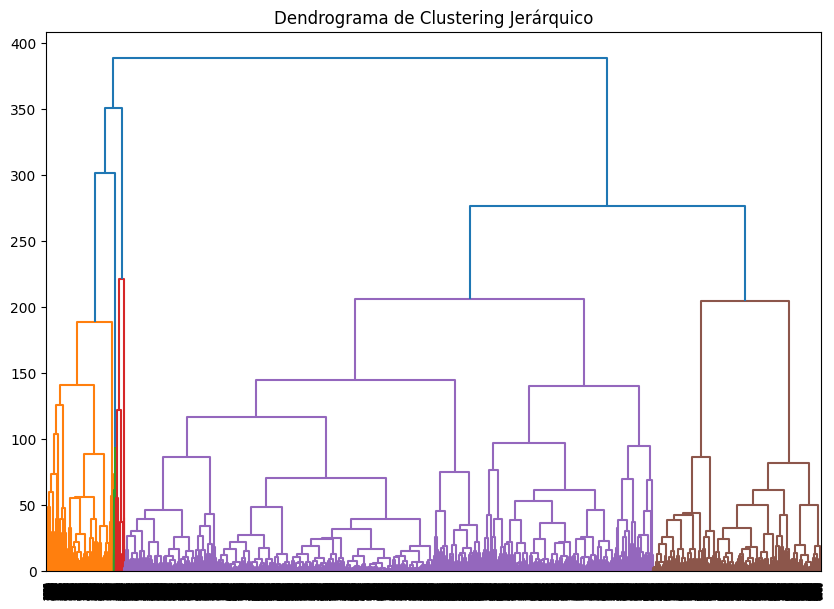

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Crear el linkage matrix para el dendrograma
linked = linkage(df_scaled1, method='ward')

# Plotear el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma de Clustering Jerárquico')
plt.show()


 el número óptimo de clusters es 2.

Este Silhouette Score indica que los clusters están bien definidos y tienen una buena cohesión, especialmente considerando la naturaleza de los datos.



El método de Clustering Jerárquico Aglomerativo con 2 clusters fue seleccionado como el mejor basado en el Silhouette Score de 0.5018, que indica una buena cohesión dentro de los clusters y una clara separación entre ellos. Este puntaje sugiere que los datos están bien agrupados en dos clusters, ya que es el valor más alto obtenido en comparación con los otros métodos y configuraciones probadas. Otros enfoques, como el uso de más clusters, produjeron una disminución significativa en el Silhouette Score, lo que indica que no mejoraban la estructura de los datos y que posiblemente sobredividían los grupos. Por lo tanto, este modelo balancea de manera óptima la cohesión interna de los clusters y la separación entre ellos, haciendo que sea la opción más adecuada para tus datos.

In [46]:
# best_model = KMeans(random_state=42,n_clusters=K)
# best_model = KMedoids(random_state=42,n_clusters=K)

# best_model = DBSCAN(**best_params)
# best_model = AgglomerativeClustering(**best_params)

In [47]:
#best_model.fit(df_preprocesssed)

In [50]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=2)
agglomerative_labels = agglomerative.fit_predict(df_scaled1)  # Esto genera las etiquetas de cluster


In [51]:
df_scaled1['CLUSTER'] = agglomerative_labels

In [52]:
print(df_scaled1.head())

    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.438264           -1.81818  -0.249199         -0.068267   
1  1.193851           -0.90909  -0.337380         -0.068267   
2  0.828708            0.00000   0.377284          1.251277   
3  0.401017           -3.63636   1.048190          2.490027   
4 -0.037245            0.00000  -0.322591         -0.040960   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.014552      0.000000            -0.399999   
1               -0.188414      5.719438            -0.600000   
2               -0.188414      0.000000             0.600000   
3               -0.188414      0.182679            -0.500000   
4               -0.188414      0.000000            -0.500000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.249999                         -0.111112   
1                   -0.249999                         -0.222223   
2                    2.750004      

In [53]:
df_scaled1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8876 entries, 0 to 8875
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8876 non-null   float64
 1   BALANCE_FREQUENCY                 8876 non-null   float64
 2   PURCHASES                         8876 non-null   float64
 3   ONEOFF_PURCHASES                  8876 non-null   float64
 4   INSTALLMENTS_PURCHASES            8876 non-null   float64
 5   CASH_ADVANCE                      8876 non-null   float64
 6   PURCHASES_FREQUENCY               8876 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8876 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8876 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8876 non-null   float64
 10  CASH_ADVANCE_TRX                  8876 non-null   float64
 11  PURCHASES_TRX                     8876 non-null   float64
 12  CREDIT

# Visualization of clusters

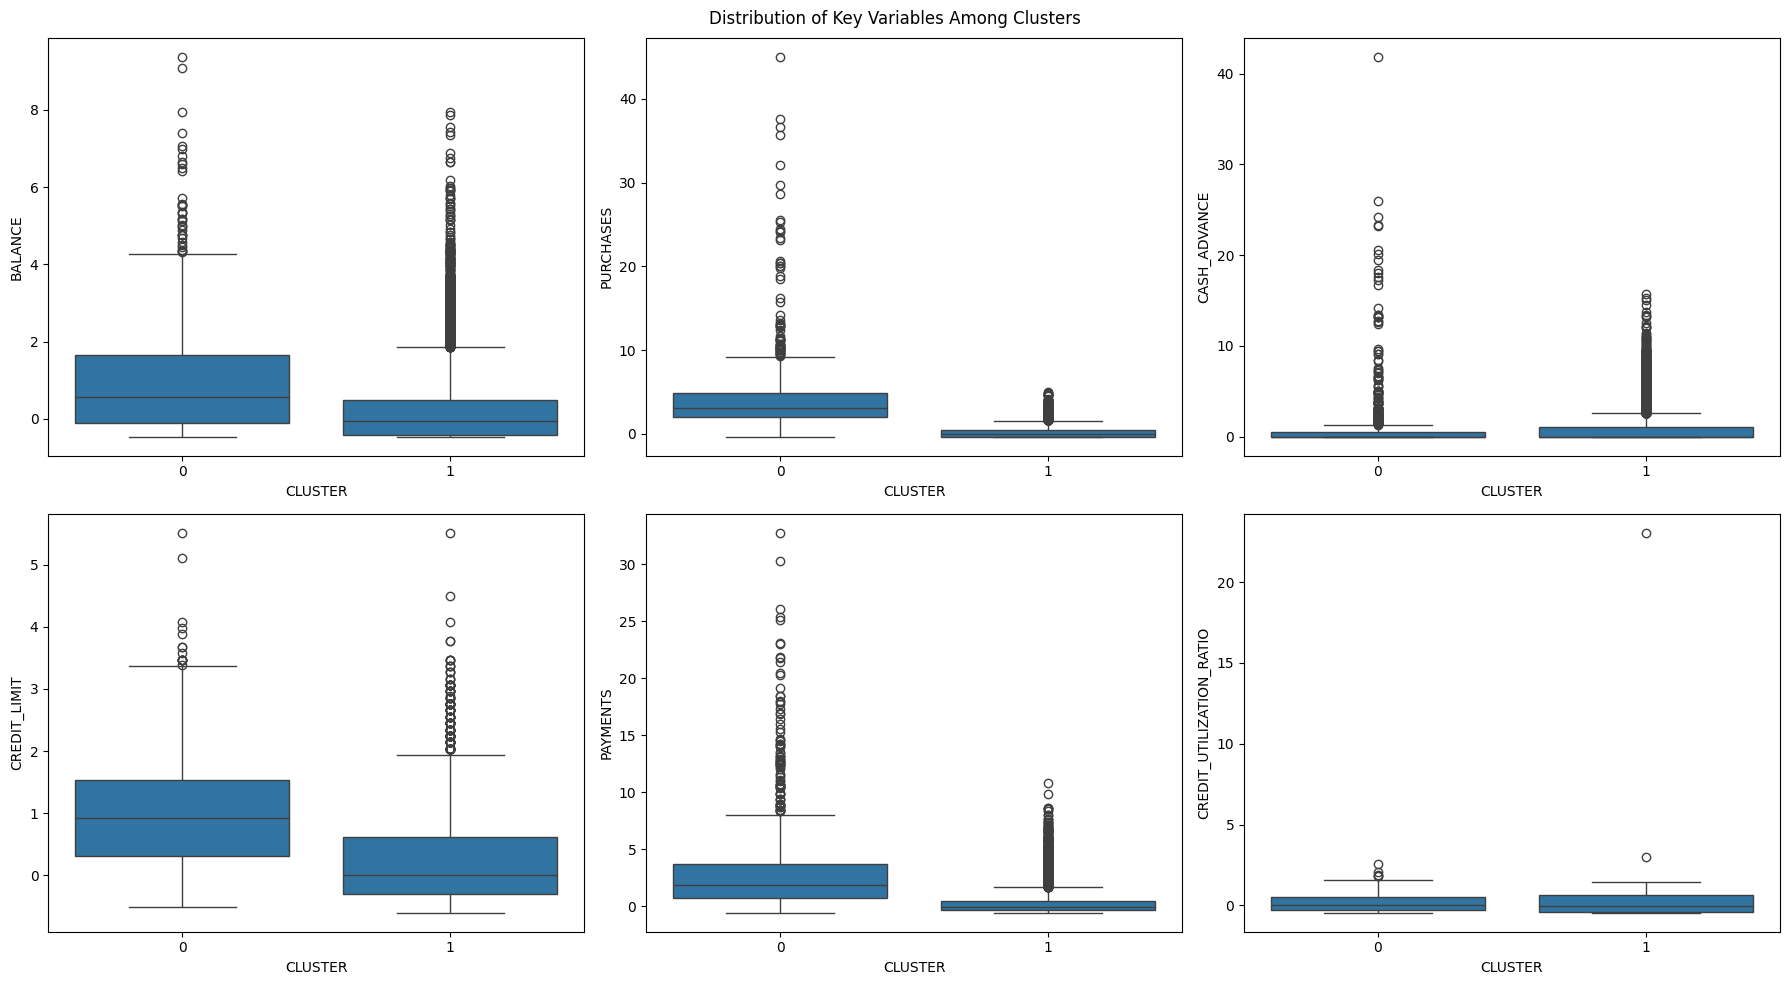

In [54]:
# Variables seleccionadas para analizar
cols = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'CREDIT_UTILIZATION_RATIO']

# Crear los boxplots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()  # Para facilitar la indexación de los subplots

for i in range(len(cols)):
    sns.boxplot(data=df_scaled1, x='CLUSTER', y=cols[i], ax=axs[i])

fig.suptitle('Distribution of Key Variables Among Clusters')
plt.tight_layout()
plt.show()

# Interpretation of clusters

Interpretación de Clusters:
1. Cluster 0: Clientes activos con un nivel alto de compras y adelantos en efectivo, generalmente con un límite de crédito más alto y una mayor utilización de crédito.
2. Cluster 1: Clientes menos activos, con menor dependencia del crédito y de adelantos en efectivo, usualmente con límites de crédito más bajos y menores pagos.
